# Data Science
In this part we will go over example tasks a data scientist would perform.
Those include:
- **Exploratory data analysis**: This is the process of investigating and summarizing data sets in order to gain insights and formulate hypotheses. It involves visualizing and summarizing data using various statistical and graphical techniques in order to understand patterns, trends, and relationships in the data,
- **Feature engineering**: This refers to the process of transforming raw data into features that can be used as inputs to machine learning algorithms. It involves selecting, extracting, and transforming relevant features from the data to improve the performance of the models,
- **Feature selection**: This is the process of selecting a subset of relevant features from a larger set of features in order to improve the performance of the models. It involves using various techniques such as correlation analysis, mutual information, and regularization to identify the most important features,
- **Splitting data**: This is the process of dividing a data set into two or more subsets, typically a training set and a testing set. The training set is used to train the machine learning models, while the testing set is used to evaluate their performance,
- **Model selection**: This is the process of selecting the most appropriate machine learning model for a particular problem. It involves evaluating various models based on their performance on a given data set and selecting the one that performs the best,
- **Model validation**: This is the process of evaluating the performance of machine learning models using validation techniques such as cross-validation and holdout validation. It involves assessing the accuracy, precision, recall, and other metrics of the models on a separate test set in order to avoid overfitting and ensure generalization,
- **Metrics**: These are measures used to evaluate the performance of machine learning models. They include accuracy, precision, recall, F1 score, ROC AUC, and many others,
- **Report**: This is a document that summarizes the findings and results of a data science project. It typically includes a description of the problem, the data used, the methods and techniques used, the results obtained, and the conclusions drawn. The report should be clear, concise, and well-organized, and it should communicate the findings to a non-technical audience.

## Setup
Importing libraries and getting the data. 

In [76]:
import random
import os

import psycopg
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *
from geopy.distance import great_circle as GRC
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from xgboost import XGBRegressor

In [6]:
conn = psycopg.connect(
   dbname=os.environ.get("DB_NAME"),
   user=os.environ.get("DB_USER"),
   password=os.environ.get("DB_PASSWORD"),
   host=os.environ.get("DB_HOST"),
   port= os.environ.get("DB_PORT")
)
cursor = conn.cursor()

In [7]:
# credentials = pd.read_json("../credentials/db.json")
# conn = psycopg2.connect(
#    database="airbnb",
#    user=credentials['airbnb']['username'],
#    password=credentials['airbnb']['password'],
#    host='airbnb.cqpzz3a3o6f2.eu-north-1.rds.amazonaws.com',
#    port= '5432'
# )

In [8]:
data = pd.read_sql('SELECT * FROM vw_airbnb', con=conn)
conn.close ()

/tmp/ipykernel_44766/1531520580.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


In [9]:
data.head()

,city_name,center_longitude,center_latitude,room_type_name,neighbourhood_name,longitude,latitude,price,minimum_nights,listing_given_id,property_type_name,accommodates,bathrooms,bedrooms,beds,bed_type_name,cancel_policy_name,features,amenities
0,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.353462,48.858654,$90.00,1,7735531,Apartment,2,1,0,1,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","Wireless Internet,Kitchen,Elevator in building..."
1,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365637,48.855628,$140.00,7,3036231,Apartment,6,1,2,2,Real Bed,moderate,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Internet,Wireless Internet,Kitchen,Heating,..."
2,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365122,48.855027,$80.00,4,2183529,Apartment,2,1,0,1,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
3,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365711,48.854519,$690.00,3,515970,Apartment,7,2,5,5,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
4,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.358326,48.857004,$90.00,5,3144316,Apartment,2,1,0,1,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","TV,Cable TV,Internet,Wireless Internet,Kitchen..."


In [11]:
data = data.replace(-1, np.nan)

## Exploratory data analysis

In [12]:
data.head()

,city_name,center_longitude,center_latitude,room_type_name,neighbourhood_name,longitude,latitude,price,minimum_nights,listing_given_id,property_type_name,accommodates,bathrooms,bedrooms,beds,bed_type_name,cancel_policy_name,features,amenities
0,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.353462,48.858654,$90.00,1,7735531,Apartment,2,1.0,0.0,1.0,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","Wireless Internet,Kitchen,Elevator in building..."
1,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365637,48.855628,$140.00,7,3036231,Apartment,6,1.0,2.0,2.0,Real Bed,moderate,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Internet,Wireless Internet,Kitchen,Heating,..."
2,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365122,48.855027,$80.00,4,2183529,Apartment,2,1.0,0.0,1.0,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
3,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365711,48.854519,$690.00,3,515970,Apartment,7,2.0,5.0,5.0,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
4,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.358326,48.857004,$90.00,5,3144316,Apartment,2,1.0,0.0,1.0,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","TV,Cable TV,Internet,Wireless Internet,Kitchen..."


In [13]:
data.shape

(54513, 19)

#### Check missing values

In [14]:
missing_dict = [{col: data[col].isnull().sum()/data[col].shape[0]} for col in data.columns]

In [15]:
missing_dict

[{'city_name': np.float64(0.0)},
 {'center_longitude': np.float64(0.0)},
 {'center_latitude': np.float64(0.0)},
 {'room_type_name': np.float64(0.0)},
 {'neighbourhood_name': np.float64(0.0)},
 {'longitude': np.float64(0.0)},
 {'latitude': np.float64(0.0)},
 {'price': np.float64(0.0)},
 {'minimum_nights': np.float64(0.0)},
 {'listing_given_id': np.float64(0.0)},
 {'property_type_name': np.float64(0.0)},
 {'accommodates': np.float64(0.0)},
 {'bathrooms': np.float64(0.0033753416616219985)},
 {'bedrooms': np.float64(0.002458129253572542)},
 {'beds': np.float64(0.001375818612074184)},
 {'bed_type_name': np.float64(0.0)},
 {'cancel_policy_name': np.float64(0.0)},
 {'features': np.float64(0.0)},
 {'amenities': np.float64(0.0)}]

In [16]:
data = data.dropna()

### Check individual variables
Make sure they make sense given what you know about the data.

*longitude* & *latitude*

In [17]:
# Checking longitude and latitude values (are they all in Paris?).
center = [48.85889, 2.320041]

# creating map
map = folium.Map(location = center, zoom_start = 12)
random_rows = random.sample(list(data.iterrows()), k=1000)

min_max_idx = [data['latitude'].idxmin(), data['longitude'].idxmin(), data['latitude'].idxmax(), data['longitude'].idxmax()]
random_rows.extend(list(data.iloc[min_max_idx].iterrows()))

for i, j in random_rows:
    location = [j['latitude'], j['longitude']]
    folium.Marker(location, popup = f'Price: {j["price"]}').add_to(map)
    if i == 999:
        break

In [19]:
map

*price*

In [20]:
data["price"]

0         $90.00
1        $140.00
2         $80.00
3        $690.00
4         $90.00
          ...   
54508     $70.00
54509    $400.00
54510      $0.00
54511     $99.00
54512     $39.00
Name: price, Length: 54186, dtype: object

In [21]:
# Problem with price... Its a string
data["price"] = data["price"].apply(lambda x: float(x.replace("$", "").replace(",", "")))

In [22]:
data["price"].nlargest(n=10)

19624    999.0
31888    999.0
48683    999.0
5896     995.0
42247    995.0
35907    986.0
5072     980.0
51773    967.0
4910     960.0
23646    950.0
Name: price, dtype: float64

In [23]:
data["price"].nsmallest(n=10)

701     -1.0
1946    -1.0
1989    -1.0
2238    -1.0
3146    -1.0
4420    -1.0
4995    -1.0
7322    -1.0
8882    -1.0
11100   -1.0
Name: price, dtype: float64

In [25]:
# Missing values were encoded as -1 in the dataset so we remove the rows
data = data.replace(-1, np.nan)
data = data.dropna()

/home/maja/Documents/ds-career-day-workshop/.venv/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 357'. Pick better value with 'binwidth'.


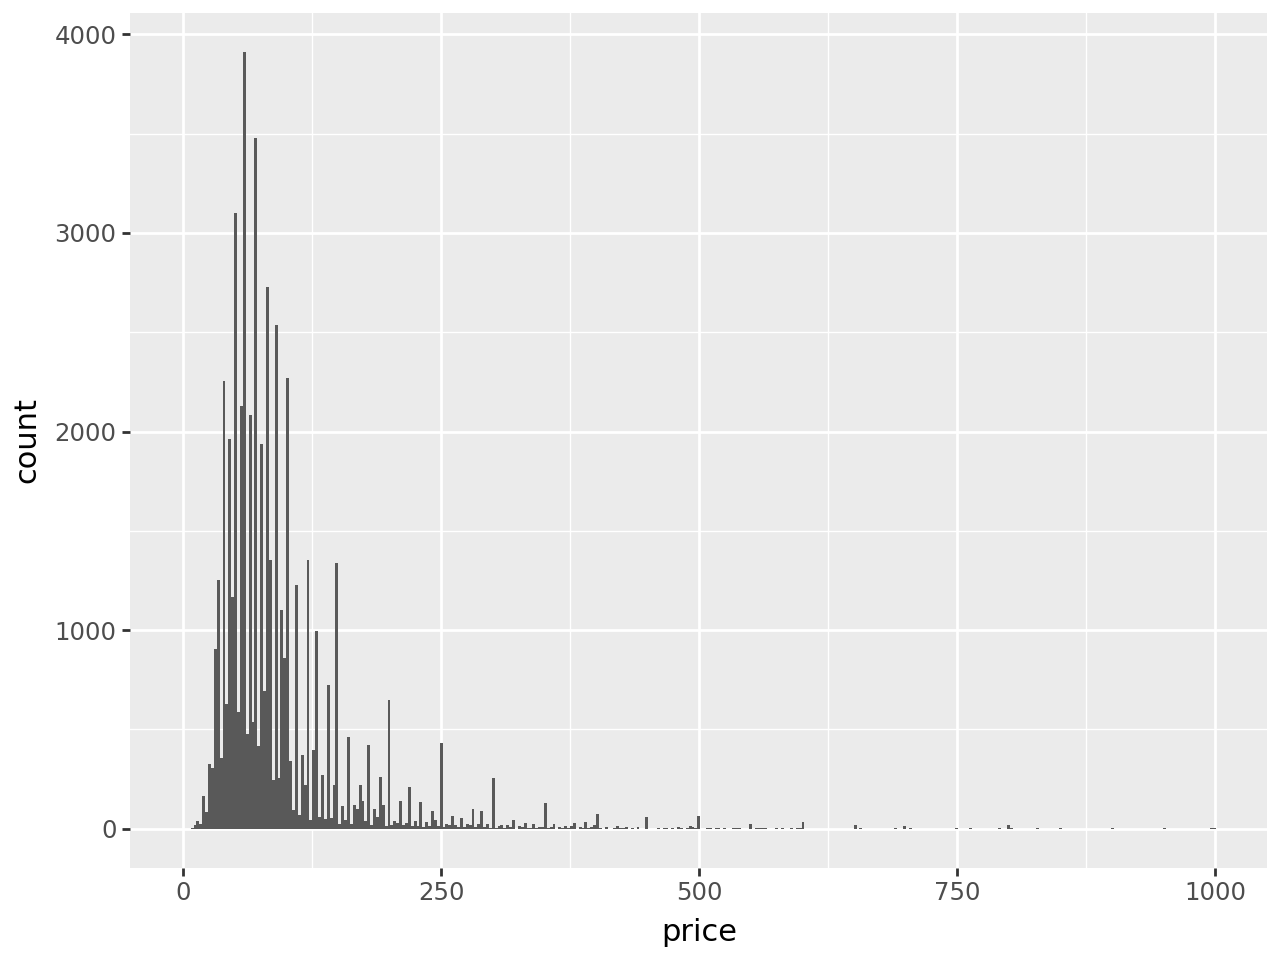

In [26]:
# Checking the price histogram
(
    ggplot(data, aes(x="price"))
    + geom_histogram()
)

In [27]:
data['price'].value_counts().iloc[:10]

price
60.0     3014
50.0     2992
70.0     2749
80.0     2573
100.0    2199
90.0     2025
65.0     1927
55.0     1779
75.0     1745
40.0     1652
Name: count, dtype: int64

*minimum_nights*

In [28]:
data["minimum_nights"].nlargest(n=10)

6576     10000
2379      9999
18895     1000
51498     1000
50377      999
25579      365
44897      365
53620      365
17102      360
6941       300
Name: minimum_nights, dtype: int64

In [29]:
data["minimum_nights"].nsmallest(n=10)

0     1
9     1
10    1
15    1
16    1
17    1
18    1
19    1
21    1
22    1
Name: minimum_nights, dtype: int64

In [30]:
data['minimum_nights'].value_counts().iloc[:30]

minimum_nights
2      15794
1      14367
3      11035
4       4480
5       3621
7       2001
6       1212
10       315
15       217
14       199
30       139
20       126
8        120
21        61
90        60
12        41
25        39
9         38
60        32
28        29
29        28
13        25
180       13
27        13
22        10
100        8
11         8
31         7
270        7
120        6
Name: count, dtype: int64

*city_name*

In [31]:
data["city_name"].nunique()

1

*room_type_name*

In [32]:
data["room_type_name"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [33]:
data["room_type_name"].value_counts()

room_type_name
Entire home/apt    46591
Private room        6999
Shared room          542
Name: count, dtype: int64

*neighbourhood_name*

In [34]:
data["neighbourhood_name"].unique()

array(['Hôtel-de-Ville', 'Buttes-Montmartre', 'Buttes-Chaumont',
       'Batignolles-Monceau', 'Popincourt', 'Palais-Bourbon', 'Opéra',
       'Ménilmontant', 'Observatoire', 'Louvre', 'Panthéon', 'Vaugirard',
       'Passy', 'Temple', 'Luxembourg', 'Élysée', 'Reuilly', 'Gobelins',
       'Entrepôt', 'Bourse'], dtype=object)

In [35]:
data["neighbourhood_name"].value_counts()

neighbourhood_name
Buttes-Montmartre      6272
Popincourt             5339
Vaugirard              3980
Entrepôt               3728
Batignolles-Monceau    3524
Ménilmontant           2961
Buttes-Chaumont        2930
Passy                  2869
Opéra                  2378
Temple                 2353
Reuilly                2144
Observatoire           2143
Panthéon               1980
Gobelins               1926
Hôtel-de-Ville         1907
Luxembourg             1832
Palais-Bourbon         1698
Bourse                 1606
Élysée                 1444
Louvre                 1118
Name: count, dtype: int64

*Amenities*

In [36]:
am = set()

In [37]:
for i, amenities in data.amenities.items():
    amenities_split = amenities.split(",")
    for amenity in amenities_split:
        am.add(amenity)

In [38]:
am

{'24-hour check-in',
 'Air conditioning',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Crib',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'Elevator in building',
 'Essentials',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'First aid kit',
 'Free parking on premises',
 'Free parking on street',
 'Game console',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'High chair',
 'Hot tub',
 'Indoor fireplace',
 'Internet',
 'Iron',
 'Keypad',
 'Kitchen',
 'Laptop friendly workspace',
 'Lock on bedroom door',
 'Lockbox',
 'NaN',
 'Other pet(s)',
 'Outlet covers',
 'Pack ’n Play/travel crib',
 'Paid parking off premises',
 'Pets allowed',
 'Pets live on this property',
 'Pool',
 'Private entrance',
 'Private living room',
 'Room-darkening shades',
 'Safety card',
 '

*Features*

In [39]:
fe = set()

In [40]:
for i, features in data.features.items():
    features_split = features.split(",")
    for feature in features_split:
        fe.add(feature)

In [41]:
fe

{'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location Exact',
 'NaN',
 'Require Guest Phone Verification',
 'Require Guest Profile Picture'}

*Cancelation Policy*

In [42]:
data["cancel_policy_name"].value_counts()

cancel_policy_name
flexible           19576
strict             18887
moderate           15658
super_strict_30        6
super_strict_60        5
Name: count, dtype: int64

*bed_type_name*

In [43]:
data["bed_type_name"].value_counts()

bed_type_name
Real Bed         48521
Pull-out Sofa     4306
Couch              899
Futon              372
Airbed              34
Name: count, dtype: int64

*property_type_name*

In [44]:
data["property_type_name"].value_counts()

property_type_name
Apartment             51734
Loft                    598
House                   548
Bed & Breakfast         389
Condominium             252
Other                   159
Boutique hotel          114
Townhouse                73
Guesthouse               71
Dorm                     64
Hostel                   33
Boat                     31
Serviced apartment       27
Cabin                    14
Villa                     8
Timeshare                 4
Bungalow                  2
Camper/RV                 2
Cave                      2
Igloo                     2
Earth House               2
Treehouse                 1
Tipi                      1
Chalet                    1
Name: count, dtype: int64

## Feature engineering

In [45]:
data.head()

,city_name,center_longitude,center_latitude,room_type_name,neighbourhood_name,longitude,latitude,price,minimum_nights,listing_given_id,property_type_name,accommodates,bathrooms,bedrooms,beds,bed_type_name,cancel_policy_name,features,amenities
0,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.353462,48.858654,90.0,1,7735531,Apartment,2,1.0,0.0,1.0,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","Wireless Internet,Kitchen,Elevator in building..."
1,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365637,48.855628,140.0,7,3036231,Apartment,6,1.0,2.0,2.0,Real Bed,moderate,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Internet,Wireless Internet,Kitchen,Heating,..."
2,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365122,48.855027,80.0,4,2183529,Apartment,2,1.0,0.0,1.0,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
3,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365711,48.854519,690.0,3,515970,Apartment,7,2.0,5.0,5.0,Real Bed,strict,"Host Has Profile Pic,Host Identity Verified,Is...","TV,Cable TV,Internet,Wireless Internet,Kitchen..."
4,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.358326,48.857004,90.0,5,3144316,Apartment,2,1.0,0.0,1.0,Real Bed,moderate,"Host Has Profile Pic,Is Location Exact","TV,Cable TV,Internet,Wireless Internet,Kitchen..."


In [46]:
data["longitude_to_center"] = data[["longitude", "center_longitude"]].apply(lambda x: x["longitude"] - x["center_longitude"], axis=1)
data["latitude_to_center"] = data[["latitude", "center_latitude"]].apply(lambda x: x["latitude"] - x["center_latitude"], axis=1)

In [47]:
data["distance_to_center"] = data[["longitude", 
                                    "latitude", 
                                    "center_longitude", 
                                    "center_latitude"]].apply(lambda x: GRC((x["latitude"], x["longitude"]), 
                                                                            (x["center_latitude"], x["center_longitude"])).km, axis=1)

In [48]:
neighbourhood_dummies = pd.get_dummies(data["neighbourhood_name"], drop_first=True)
room_type_dummies = pd.get_dummies(data["room_type_name"], drop_first=True)
bed_type_dummies = pd.get_dummies(data["bed_type_name"])
property_type_dummies = pd.get_dummies(data["property_type_name"])
cancellation_policy_dummies = pd.get_dummies(data["cancel_policy_name"], drop_first=True)

In [49]:
cancellation_policy_dummies["strict"] = (cancellation_policy_dummies["strict"] | 
                                        cancellation_policy_dummies["super_strict_30"] |  
                                        cancellation_policy_dummies["super_strict_60"])
cancellation_policy_dummies = cancellation_policy_dummies.drop(columns=["super_strict_60", "super_strict_30"])

In [50]:
bed_type_dummies = bed_type_dummies.drop(columns=["Couch", "Futon", "Airbed"])

In [51]:
property_type_dummies = property_type_dummies.drop(columns=["Boutique hotel", "Townhouse", "Guesthouse", "Dorm",                     
                                                            "Hostel", "Boat", "Serviced apartment", "Cabin", "Villa",                    
                                                            "Timeshare", "Earth House", "Camper/RV", "Cave", "Other",
                                                            "Bungalow", "Igloo", "Treehouse", "Tipi", "Chalet"])

In [52]:
data = data.join(neighbourhood_dummies)
data = data.join(room_type_dummies)
data = data.join(bed_type_dummies)
data = data.join(property_type_dummies)
data = data.join(cancellation_policy_dummies)

In [53]:
data.head()

,city_name,center_longitude,center_latitude,room_type_name,neighbourhood_name,longitude,latitude,price,minimum_nights,listing_given_id,...,Shared room,Pull-out Sofa,Real Bed,Apartment,Bed & Breakfast,Condominium,House,Loft,moderate,strict
0,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.353462,48.858654,90.0,1,7735531,...,False,False,True,True,False,False,False,False,True,False
1,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365637,48.855628,140.0,7,3036231,...,False,False,True,True,False,False,False,False,True,False
2,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365122,48.855027,80.0,4,2183529,...,False,False,True,True,False,False,False,False,False,True
3,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.365711,48.854519,690.0,3,515970,...,False,False,True,True,False,False,False,False,False,True
4,Paris,2.348391,48.853495,Entire home/apt,Hôtel-de-Ville,2.358326,48.857004,90.0,5,3144316,...,False,False,True,True,False,False,False,False,True,False


## Feature selection

In [54]:
df = data.drop(["neighbourhood_name", "longitude", "latitude", 'listing_given_id',
                "property_type_name", "center_longitude", "center_latitude", 
                "price", "minimum_nights", "room_type_name", "bed_type_name",
                "cancel_policy_name", "features", "amenities", "city_name"], axis=1)
target = data["price"]

In [55]:
df.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'longitude_to_center',
       'latitude_to_center', 'distance_to_center', 'Bourse', 'Buttes-Chaumont',
       'Buttes-Montmartre', 'Entrepôt', 'Gobelins', 'Hôtel-de-Ville', 'Louvre',
       'Luxembourg', 'Ménilmontant', 'Observatoire', 'Opéra', 'Palais-Bourbon',
       'Panthéon', 'Passy', 'Popincourt', 'Reuilly', 'Temple', 'Vaugirard',
       'Élysée', 'Private room', 'Shared room', 'Pull-out Sofa', 'Real Bed',
       'Apartment', 'Bed & Breakfast', 'Condominium', 'House', 'Loft',
       'moderate', 'strict'],
      dtype='object')

In [56]:
df.head()

,accommodates,bathrooms,bedrooms,beds,longitude_to_center,latitude_to_center,distance_to_center,Bourse,Buttes-Chaumont,Buttes-Montmartre,...,Shared room,Pull-out Sofa,Real Bed,Apartment,Bed & Breakfast,Condominium,House,Loft,moderate,strict
0,2,1.0,0.0,1.0,0.005070,0.005159,0.683186,False,False,False,...,False,False,True,True,False,False,False,False,True,False
1,6,1.0,2.0,2.0,0.017245,0.002133,1.283819,False,False,False,...,False,False,True,True,False,False,False,False,True,False
2,2,1.0,0.0,1.0,0.016730,0.001532,1.235852,False,False,False,...,False,False,True,True,False,False,False,False,False,True
3,7,2.0,5.0,5.0,0.017320,0.001024,1.272298,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,2,1.0,0.0,1.0,0.009934,0.003509,0.824945,False,False,False,...,False,False,True,True,False,False,False,False,True,False


## Splitting data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, random_state=42)

## Model Selection

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [59]:
numeric_columns = ["accommodates", "bathrooms",	"bedrooms",	
                    "beds", "longitude_to_center", 
                    "latitude_to_center",	"distance_to_center"]

In [60]:
numeric_columns = ["longitude_to_center", 
                    "latitude_to_center",	"distance_to_center"]

In [61]:
scaler = StandardScaler().fit(X_train[numeric_columns])

In [62]:
X_train_scaled = scaler.transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

In [63]:
X_train = X_train.drop(columns=numeric_columns)
X_test = X_test.drop(columns=numeric_columns)

In [64]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

X_train = pd.concat([X_train, pd.DataFrame(X_train_scaled, columns=numeric_columns)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(X_test_scaled, columns=numeric_columns)], axis=1)

In [65]:
model = LinearRegression()

In [79]:
model = XGBRegressor()

In [67]:
model = MLPRegressor(random_state=42, early_stopping=True, verbose=True)

In [80]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [71]:
preds = model.predict(X_test)

In [74]:
mean_squared_error(y_test, preds)

2393.6327830357736

In [77]:
root_mean_squared_error(y_test, preds) # Relative mean squared error

48.92476656087154

In [81]:
model.feature_importances_ # Only for XGBoost model

array([0.05354772, 0.299797  , 0.12124436, 0.01120982, 0.00664544,
       0.00203676, 0.01734802, 0.00622663, 0.00329764, 0.01261129,
       0.00800745, 0.02256145, 0.00626365, 0.00313023, 0.01400275,
       0.03005006, 0.00509262, 0.01130384, 0.0100318 , 0.00625861,
       0.01034951, 0.01579536, 0.04190341, 0.03446836, 0.03340896,
       0.00575401, 0.02157782, 0.02019219, 0.00579159, 0.01099472,
       0.00934541, 0.01143911, 0.00955869, 0.04357374, 0.02450319,
       0.02416127, 0.0265155 ], dtype=float32)

## Model Validation

In [ ]:
#TODO

## Report

In [ ]:
#TODO